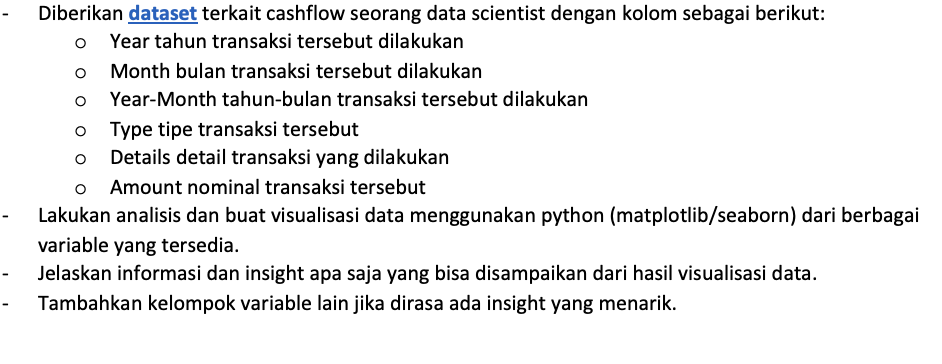

In [ ]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('cashflow.csv', sep=';')


In [ ]:
# Showing dataset information
print(df.info())

# Showing couple of row of the dataset
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        255 non-null    int64  
 1   Month       255 non-null    int64  
 2   Year-Month  255 non-null    object 
 3   Type        255 non-null    object 
 4   Details     255 non-null    object 
 5   Amount      255 non-null    object 
 6   Unnamed: 6  0 non-null      float64
dtypes: float64(1), int64(2), object(4)
memory usage: 14.1+ KB
None
   Year  Month Year-Month     Type          Details        Amount  Unnamed: 6
0  2021      9     2021-9   Income           Salary  Rp18.000.000         NaN
1  2021      9     2021-9  Expense  Food & Beverage     Rp467.200         NaN
2  2021      9     2021-9  Expense          Fitness     Rp173.000         NaN
3  2021      9     2021-9  Expense   Transportation      Rp14.000         NaN
4  2021     10    2021-10   Income           Salary  Rp12.000.000    

In [ ]:
# Describe dataset statistics
print(df.describe())

# How many unique at a column
print(df.nunique())


              Year       Month  Unnamed: 6
count   255.000000  255.000000         0.0
mean   2022.145098    6.247059         NaN
std       0.638747    3.747669         NaN
min    2021.000000    1.000000         NaN
25%    2022.000000    3.000000         NaN
50%    2022.000000    5.000000         NaN
75%    2023.000000   10.000000         NaN
max    2023.000000   12.000000         NaN
Year            3
Month          12
Year-Month     21
Type            2
Details        27
Amount        202
Unnamed: 6      0
dtype: int64


In [ ]:
# Remove the unnamed column
df.drop(columns=['Unnamed: 6'], inplace=True)

In [ ]:
df.columns

Index(['Year', 'Month', 'Year-Month', 'Type', 'Details', 'Amount'], dtype='object')

# Numeric Variables

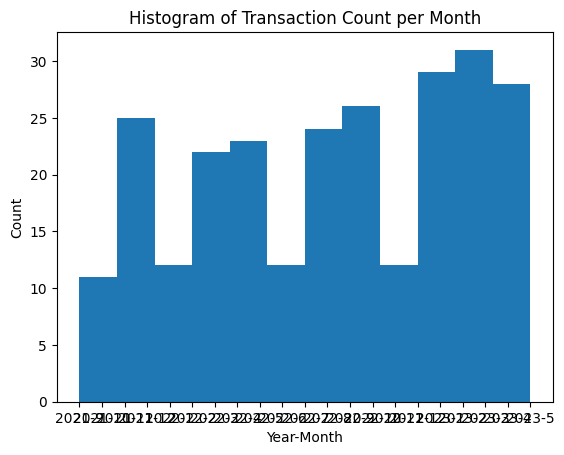

In [ ]:
# Histogram
plt.hist(df['Year-Month'], bins=12)
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.title('Histogram of Transaction Count per Month')
plt.show()

From this histogram, we can see whether certain months have a higher or lower number of transactions compared to other months.

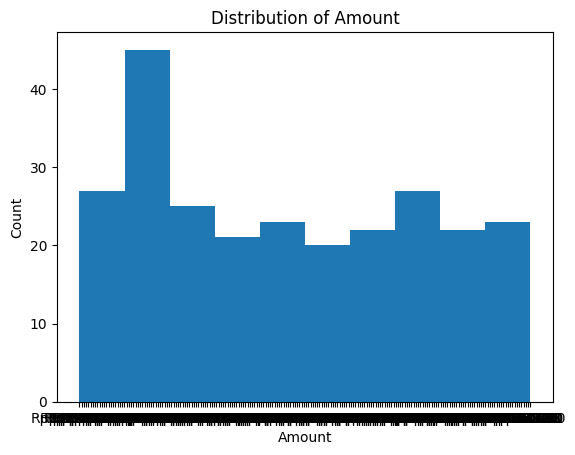

In [ ]:
# Histogram
plt.hist(df['Amount'], bins=10)
plt.xlabel('Amount')
plt.ylabel('Count')
plt.title('Distribution of Amount')
plt.show()

<ipython-input-35-a83806f44e03>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Amount'] = df['Amount'].str.replace('.','')  # Remove commas


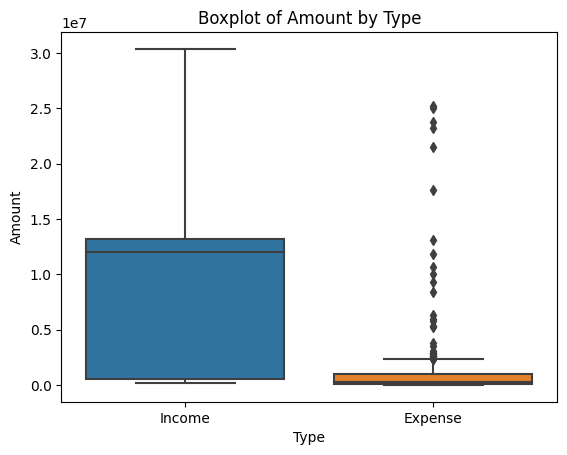

In [ ]:
# Remove non-numeric characters from 'Amount' column
df['Amount'] = df['Amount'].str.replace('[^\d.]', '', regex=True)
df['Amount'] = df['Amount'].str.replace('.','')  # Remove commas

# Convert 'Amount' column to numeric data type
df['Amount'] = pd.to_numeric(df['Amount'])

# Create the boxplot
sns.boxplot(x=df['Type'], y=df['Amount'])
plt.xlabel('Type')
plt.ylabel('Amount')
plt.title('Boxplot of Amount by Type')
plt.show()


From the histogram and boxplot, we can see the distribution and comparison of the number of transactions based on the nominal amount (Amount). We can identify outliers and see the differences between transaction types (Type).

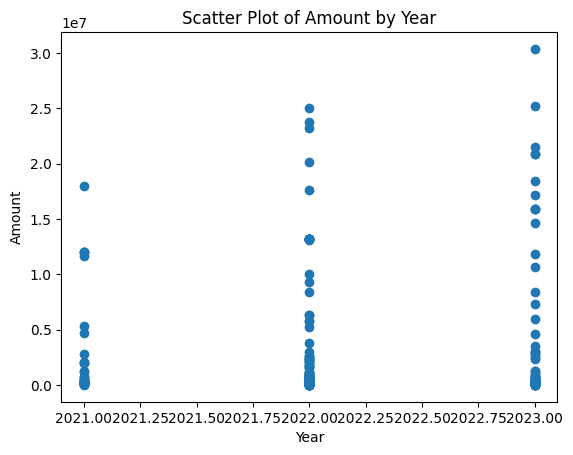

In [ ]:
# Scatter plot
plt.scatter(df['Year'], df['Amount'])
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Scatter Plot of Amount by Year')
plt.show()

From the scatter plot, We can see the relationship pattern between the year (Year) and the nominal number of transactions (Amount).

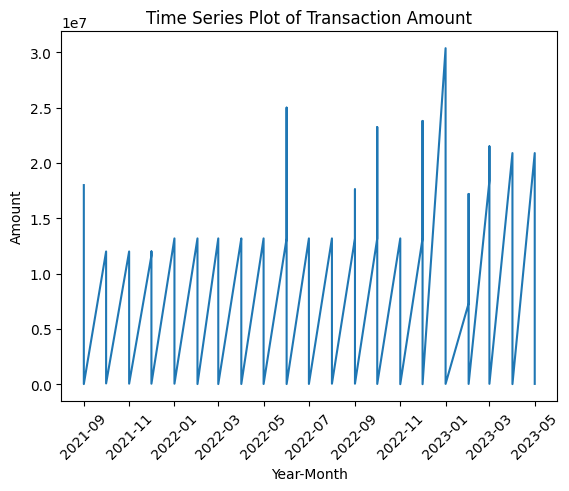

In [ ]:
df['Year-Month'] = pd.to_datetime(df['Year-Month'])  # Convert Year-Month column to datetime

plt.plot(df['Year-Month'], df['Amount'])
plt.xlabel('Year-Month')
plt.ylabel('Amount')
plt.title('Time Series Plot of Transaction Amount')
plt.xticks(rotation=45)
plt.show()


From this time series plot, we can see whether there is an upward or downward trend in the number of transactions from month to month, as well as pay attention to any seasonal patterns that may exist.

# Categorical Variables

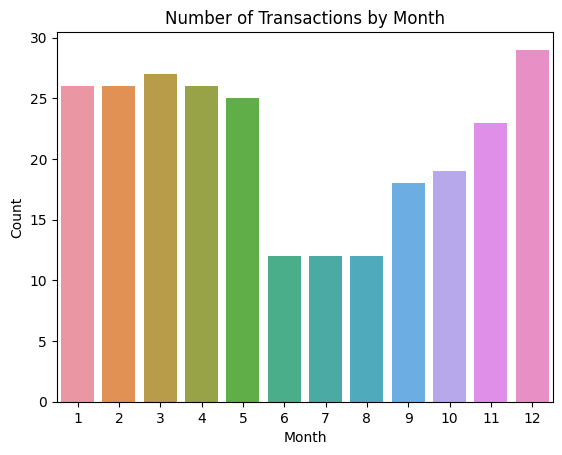

In [ ]:
# Bar plot
sns.countplot(x=df['Month'])
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Number of Transactions by Month')
plt.show()

From the bar plot, we can see the number of transactions by month (Month).

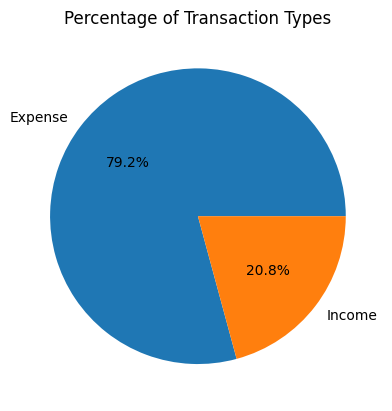

In [ ]:
# Pie chart
type_counts = df['Type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%')
plt.title('Percentage of Transaction Types')
plt.show()

From the pie chart, we can see the percentage of different transaction types.